Project: Intelligent poject/Manufacturing schedulling- ML Approach

Student Name : R Ananda Narayanan

BITS ID : 2022DC04382

IMPORT NECESSARY LIBRARY

In [1]:
# Import necessary libraries for data read and cleansing
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import openpyxl
import warnings
import datetime
import calendar

# Model libraries

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix



warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set up directory path

In [3]:
# @title B. Setup Directory Path: COLAB or LOCAL
if 'COLAB_GPU' in os.environ:
    from google.colab import drive
    drive.mount('/content/drive')
    print("We are using 'Google Colab'")
else:
    print("Running 'Jupyter Notebook' from 'Local Machine'")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
We are using 'Google Colab'


In [4]:
# @title B.1 Set Files and Directories
ROOT_DIR         = "/content/drive/MyDrive/Dissertation_dc04382/Data"

In [5]:
# @title B.2 import prefinal data set for testing
prefinal_dataset=pd.read_excel("/content/drive/MyDrive/Dissertation_dc04382/Data/prefinal_dataset3_for_board_analyse.xlsx")

In [6]:
prefinal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   board number           864 non-null    object        
 1   CXO_date               864 non-null    datetime64[ns]
 2   TF3                    242 non-null    float64       
 3   TF900                  348 non-null    float64       
 4   RP                     210 non-null    float64       
 5   TQ3SFF                 16 non-null     float64       
 6   TQ3SFDO                149 non-null    float64       
 7   TQ3DF Fxd              76 non-null     float64       
 8   TQ3DFDO                439 non-null    float64       
 9   total_verticals        864 non-null    int64         
 10  INFO                   864 non-null    object        
 11  type_board             864 non-null    object        
 12  FAULT LEVEL            864 non-null    object        
 13  BUSBA

**Feature engineering**

In [7]:
#  convert CXO_date to numerical for feature engineering

prefinal_dataset['CXO_date'] = pd.to_datetime(prefinal_dataset['CXO_date'])

# Extract numerical features from the date
prefinal_dataset['CXO_year'] = prefinal_dataset['CXO_date'].dt.year
prefinal_dataset['CXO_month'] = prefinal_dataset['CXO_date'].dt.month
prefinal_dataset['CXO_day'] = prefinal_dataset['CXO_date'].dt.day
prefinal_dataset




,board number,CXO_date,TF3,TF900,RP,TQ3SFF,TQ3SFDO,TQ3DF Fxd,TQ3DFDO,total_verticals,...,no_of_days_MFG,Vendor name,CXO2DIN_diff,PRD_RED_MFG_Days,Billing Date,Unnamed: 29,Unnamed: 30,CXO_year,CXO_month,CXO_day
0,SYQF766,2022-07-05,5.0,NaN,NaN,NaN,NaN,NaN,8.0,13,...,110,NaN,183,140,2024-11-30,NaN,NaN,2022,7,5
1,SYRE539,2022-07-05,NaN,1.0,NaN,NaN,NaN,NaN,5.0,6,...,80,NaN,183,125,2024-12-28,NaN,NaN,2022,7,5
2,SYSF979,2022-10-19,7.0,NaN,3.0,NaN,NaN,15.0,NaN,25,...,68,Simser Controls & Systems,171,123,2024-02-27,NaN,NaN,2022,10,19
3,SYWF990,2022-12-15,12.0,NaN,1.0,NaN,NaN,NaN,16.0,29,...,68,Simser Controls & Systems,349,121,2024-03-29,NaN,NaN,2022,12,15
4,SYWF991,2022-12-15,9.0,NaN,1.0,NaN,NaN,NaN,8.0,18,...,64,Venkateswara Suppliers private ltd,349,121,2024-03-29,NaN,NaN,2022,12,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,SYSL035,2024-07-09,8.0,NaN,NaN,NaN,NaN,NaN,4.0,12,...,29,SRI SAI CONTROLS,70,105,2024-12-31,NaN,NaN,2024,7,9
860,SYSB776,2024-09-13,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,...,26,Simser Controls & Systems,13,91,2024-12-26,NaN,NaN,2024,9,13
861,SYSB777,2024-09-13,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,...,26,Simser Controls & Syrtems,13,91,2024-12-26,NaN,NaN,2024,9,13
862,SYSS051,2024-09-23,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1,...,8,inhouse,5,13,2024-10-11,NaN,NaN,2024,9,23


In [9]:
prefinal_dataset = prefinal_dataset[['board number', 'CXO_year', 'CXO_month', 'CXO_day','CXO_date', 'TF3', 'TF900', 'RP', 'TQ3SFF', 'TQ3SFDO','TQ3DF Fxd', 'TQ3DFDO','total_verticals', 'INFO', 'type_board','FAULT LEVEL', 'BUSBAR LOCATION', 'FORM OF SEPARATION', 'FIXED/DRAWOUT','SYSTEM',
                                  'number_of_bus', 'number_2_tier', 'EQP', 'FINAL TP','CAT number', 'iqr', 'average_cat_lead_time', 'no_of_days_MFG','Vendor name','CXO2DIN_diff','Billing Date','PRD_RED_MFG_Days']]

In [10]:
prefinal_dataset

,board number,CXO_year,CXO_month,CXO_day,CXO_date,TF3,TF900,RP,TQ3SFF,TQ3SFDO,...,EQP,FINAL TP,CAT number,iqr,average_cat_lead_time,no_of_days_MFG,Vendor name,CXO2DIN_diff,Billing Date,PRD_RED_MFG_Days
0,SYQF766,2022,7,5,2022-07-05,5.0,NaN,NaN,NaN,NaN,...,29.6,5.878406e+06,SF90126OOOO,48.25,101.0,110,NaN,183,2024-11-30,140
1,SYRE539,2022,7,5,2022-07-05,NaN,1.0,NaN,NaN,NaN,...,12.72,2.220000e+05,XM81520,18.00,72.0,80,NaN,183,2024-12-28,125
2,SYSF979,2022,10,19,2022-10-19,7.0,NaN,3.0,NaN,NaN,...,52.04,7.489379e+06,NaN,NaN,NaN,68,Simser Controls & Systems,171,2024-02-27,123
3,SYWF990,2022,12,15,2022-12-15,12.0,NaN,1.0,NaN,NaN,...,65.64,1.300400e+07,SL92044OOOO,0.00,71.0,68,Simser Controls & Systems,349,2024-03-29,121
4,SYWF991,2022,12,15,2022-12-15,9.0,NaN,1.0,NaN,NaN,...,41.48,7.786000e+06,SPE0429500005,16.50,97.0,64,Venkateswara Suppliers private ltd,349,2024-03-29,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,SYSL035,2024,7,9,2024-07-09,8.0,NaN,NaN,NaN,NaN,...,27.76,5.970000e+05,SPE0495200011,5.00,131.0,29,SRI SAI CONTROLS,70,2024-12-31,105
860,SYSB776,2024,9,13,2024-09-13,1.0,NaN,NaN,NaN,NaN,...,2.7,6.630000e+04,LADN-02,48.50,107.0,26,Simser Controls & Systems,13,2024-12-26,91
861,SYSB777,2024,9,13,2024-09-13,1.0,NaN,NaN,NaN,NaN,...,2.7,6.630000e+04,LADN-02,48.50,107.0,26,Simser Controls & Syrtems,13,2024-12-26,91
862,SYSS051,2024,9,23,2024-09-23,NaN,NaN,1.0,NaN,NaN,...,1,4.500004e+04,SF90126OOOO,48.25,101.0,8,inhouse,5,2024-10-11,13


In [11]:
# @title Data pre processing & featuring
prefinal_dataset= prefinal_dataset.drop(['board number','CXO_date','CAT number','Vendor name','Billing Date'], axis=1)
prefinal_dataset = prefinal_dataset.fillna(0)
prefinal_dataset.head()


,CXO_year,CXO_month,CXO_day,TF3,TF900,RP,TQ3SFF,TQ3SFDO,TQ3DF Fxd,TQ3DFDO,...,SYSTEM,number_of_bus,number_2_tier,EQP,FINAL TP,iqr,average_cat_lead_time,no_of_days_MFG,CXO2DIN_diff,PRD_RED_MFG_Days
0,2022,7,5,5.0,0.0,0.0,0.0,0.0,0.0,8.0,...,TP+50%N (3PH4W),2,4.0,29.6,5.878406e+06,48.25,101.0,110,183,140
1,2022,7,5,0.0,1.0,0.0,0.0,0.0,0.0,5.0,...,TP+50%N (3PH4W),2,0.0,12.72,2.220000e+05,18.00,72.0,80,183,125
2,2022,10,19,7.0,0.0,3.0,0.0,0.0,15.0,0.0,...,TP+50%N (3PH4W),2,6.0,52.04,7.489379e+06,0.00,0.0,68,171,123
3,2022,12,15,12.0,0.0,1.0,0.0,0.0,0.0,16.0,...,TP+50%N (3PH4W),2,14.0,65.64,1.300400e+07,0.00,71.0,68,349,121
4,2022,12,15,9.0,0.0,1.0,0.0,0.0,0.0,8.0,...,TP+50%N (3PH4W),2,18.0,41.48,7.786000e+06,16.50,97.0,64,349,121


In [12]:
#@title Encoding categorical value
prefinal_dataset['INFO']=prefinal_dataset['INFO'].replace({'TF+TQ':'1', 'T-ERA':'2','CDO+':  '3'})
prefinal_dataset['type_board']=prefinal_dataset['type_board'].replace({'MCC':'1', 'PCC':'2','PMCC':  '3'})
prefinal_dataset['FAULT LEVEL']=prefinal_dataset['FAULT LEVEL'].replace(to_replace=['50KA FOR 1 SEC', '65KA FOR 1 SEC','80KA FOR 1 SEC'], value=['1', '2','3'], regex=True)
prefinal_dataset['BUSBAR LOCATION']=prefinal_dataset['BUSBAR LOCATION'].replace(to_replace=['TOP', 'BOTTOM'], value=['1', '2'], regex=True)

prefinal_dataset['FORM OF SEPARATION'] = prefinal_dataset['FORM OF SEPARATION'].replace(to_replace=['FORM3B', 'FORM4A','FORM4B','FORM4BTYPE6','FORM4BTYPE7'],value=['1','2','3','4','5'], regex=True)
prefinal_dataset['FIXED/DRAWOUT']=prefinal_dataset['FIXED/DRAWOUT'].replace(to_replace=['DRAWOUT', 'FIXED'], value=['1', '2'], regex=True)
prefinal_dataset['SYSTEM'] = prefinal_dataset['SYSTEM'].replace({'TP (3PH3W)': '1', 'TP+50%N (3PH4W)': '2', 'TP+100%N (3PH4W)': '3'})
#print(prefinal_dataset[prefinal_dataset['board number']=='SYRE710'])FORM -4B TYPE6

In [13]:
# CONVERT ALL PREFINAL_DATASET STRING TO FLOAT

# Convert specified columns to numeric, coercing errors to NaN
for col in ['INFO', 'type_board', 'FAULT LEVEL', 'BUSBAR LOCATION', 'FORM OF SEPARATION', 'FIXED/DRAWOUT', 'SYSTEM','EQP']:
    prefinal_dataset[col] = pd.to_numeric(prefinal_dataset[col], errors='coerce')

# Fill NaN values resulting from conversion errors (if any)
prefinal_dataset = prefinal_dataset.fillna(0)

prefinal_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CXO_year               864 non-null    int32  
 1   CXO_month              864 non-null    int32  
 2   CXO_day                864 non-null    int32  
 3   TF3                    864 non-null    float64
 4   TF900                  864 non-null    float64
 5   RP                     864 non-null    float64
 6   TQ3SFF                 864 non-null    float64
 7   TQ3SFDO                864 non-null    float64
 8   TQ3DF Fxd              864 non-null    float64
 9   TQ3DFDO                864 non-null    float64
 10  total_verticals        864 non-null    int64  
 11  INFO                   864 non-null    int64  
 12  type_board             864 non-null    int64  
 13  FAULT LEVEL            864 non-null    int64  
 14  BUSBAR LOCATION        864 non-null    int64  
 15  FORM O

**EDA Analysis**

In [14]:
# @title EDA for the prefinal__dataset
'''
# Display basic statistics
print(prefinal_dataset.describe())

# Check for missing values
print(prefinal_dataset.isnull().sum())

# Data types of each column
print(prefinal_dataset.dtypes)

# Visualize the distribution of numerical features
for col in ['EQP','INFO', 'type_board', 'FAULT LEVEL', 'BUSBAR LOCATION', 'FORM OF SEPARATION', 'FIXED/DRAWOUT', 'SYSTEM']:
    plt.figure(figsize=(8, 6))
    sns.histplot(prefinal_dataset[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Explore relationships between features using pairplot (for a subset of features)
sns.pairplot(prefinal_dataset[['EQP','INFO', 'type_board', 'FAULT LEVEL']], diag_kind='kde')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(prefinal_dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Box plots to visualize the distribution of numerical features for different categories
for col in ['EQP','INFO', 'type_board', 'FAULT LEVEL', 'BUSBAR LOCATION', 'FORM OF SEPARATION', 'FIXED/DRAWOUT', 'SYSTEM']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='EQP', y=col, data=prefinal_dataset)
    plt.title(f'Boxplot of {col} vs EQP')
    plt.show()

# Count plots for categorical features
for col in ['INFO', 'type_board', 'FAULT LEVEL', 'BUSBAR LOCATION', 'FORM OF SEPARATION', 'FIXED/DRAWOUT', 'SYSTEM']:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=col, data=prefinal_dataset)
  plt.title(f'Count of {col}')
  plt.xticks(rotation=45, ha='right')
  plt.show()
'''

"\n# Display basic statistics\nprint(prefinal_dataset.describe())\n\n# Check for missing values\nprint(prefinal_dataset.isnull().sum())\n\n# Data types of each column\nprint(prefinal_dataset.dtypes)\n\n# Visualize the distribution of numerical features\nfor col in ['EQP','INFO', 'type_board', 'FAULT LEVEL', 'BUSBAR LOCATION', 'FORM OF SEPARATION', 'FIXED/DRAWOUT', 'SYSTEM']:\n    plt.figure(figsize=(8, 6))\n    sns.histplot(prefinal_dataset[col], kde=True)\n    plt.title(f'Distribution of {col}')\n    plt.show()\n\n# Explore relationships between features using pairplot (for a subset of features)\nsns.pairplot(prefinal_dataset[['EQP','INFO', 'type_board', 'FAULT LEVEL']], diag_kind='kde')\nplt.show()\n\n# Correlation matrix heatmap\nplt.figure(figsize=(12, 10))\nsns.heatmap(prefinal_dataset.corr(), annot=True, cmap='coolwarm')\nplt.title('Correlation Matrix Heatmap')\nplt.show()\n\n# Box plots to visualize the distribution of numerical features for different categories\nfor col in ['EQ

In [15]:
# @title Univariate, Bivariate , Multivariate analysis for prefinal_dataset DF
'''
# Univariate Analysis
for column in prefinal_dataset.columns:
    print(f"Univariate Analysis for {column}:")
    print(prefinal_dataset[column].describe())  # Summary statistics
    plt.figure(figsize=(8, 6))
    if prefinal_dataset[column].dtype == 'object':
        prefinal_dataset[column].value_counts().plot(kind='bar')
        plt.title(f'Bar plot of {column}')
    else:
        sns.histplot(prefinal_dataset[column], kde=True)  # Histogram with KDE
        plt.title(f'Distribution of {column}')
    plt.show()


# Bivariate Analysis
for col1 in prefinal_dataset.columns:
    for col2 in prefinal_dataset.columns:
        if col1 != col2:
            print(f"Bivariate Analysis: {col1} vs {col2}")
            plt.figure(figsize=(8, 6))
            if prefinal_dataset[col1].dtype == 'object' and prefinal_dataset[col2].dtype == 'object':
                pd.crosstab(prefinal_dataset[col1], prefinal_dataset[col2]).plot(kind='bar')
                plt.title(f'Bar plot of {col1} vs {col2}')
            elif prefinal_dataset[col1].dtype != 'object' and prefinal_dataset[col2].dtype != 'object':
                sns.scatterplot(x=col1, y=col2, data=prefinal_dataset)
                plt.title(f'Scatter plot of {col1} vs {col2}')
            else:
                sns.boxplot(x=col1, y=col2, data=prefinal_dataset)
                plt.title(f'Box plot of {col1} vs {col2}')
            plt.show()


# Multivariate Analysis (Example: Pairplot)
selected_columns = ['EQP', 'INFO', 'type_board', 'FAULT LEVEL'] # You can adjust columns
sns.pairplot(prefinal_dataset[selected_columns], diag_kind='kde')
plt.suptitle('Multivariate Analysis: Pairplot of Selected Features', y=1.02)
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(prefinal_dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
'''


'\n# Univariate Analysis\nfor column in prefinal_dataset.columns:\n    print(f"Univariate Analysis for {column}:")\n    print(prefinal_dataset[column].describe())  # Summary statistics\n    plt.figure(figsize=(8, 6))\n    if prefinal_dataset[column].dtype == \'object\':\n        prefinal_dataset[column].value_counts().plot(kind=\'bar\')\n        plt.title(f\'Bar plot of {column}\')\n    else:\n        sns.histplot(prefinal_dataset[column], kde=True)  # Histogram with KDE\n        plt.title(f\'Distribution of {column}\')\n    plt.show()\n\n\n# Bivariate Analysis\nfor col1 in prefinal_dataset.columns:\n    for col2 in prefinal_dataset.columns:\n        if col1 != col2:\n            print(f"Bivariate Analysis: {col1} vs {col2}")\n            plt.figure(figsize=(8, 6))\n            if prefinal_dataset[col1].dtype == \'object\' and prefinal_dataset[col2].dtype == \'object\':\n                pd.crosstab(prefinal_dataset[col1], prefinal_dataset[col2]).plot(kind=\'bar\')\n                plt.

In [16]:
# upload output  in seperate image  file
'''
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...

# @title Univariate, Bivariate , Multivariate analysis for prefinal_dataset DF

# ... (your existing code) ...

# Save each plot as a separate image file
plot_index = 1
for column in prefinal_dataset.columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    if prefinal_dataset[column].dtype == 'object':
        prefinal_dataset[column].value_counts().plot(kind='bar')
        plt.title(f'Bar plot of {column}')
    else:
        sns.histplot(prefinal_dataset[column], kde=True)
        plt.title(f'Distribution of {column}')
    plt.savefig(f'univariate_plot_{plot_index}.png')  # Save the plot
    plot_index += 1
    plt.close() # Close the plot to free memory

plot_index = 1
for col1 in prefinal_dataset.columns:
    for col2 in prefinal_dataset.columns:
        if col1 != col2:
            plt.figure(figsize=(8, 6))
            if prefinal_dataset[col1].dtype == 'object' and prefinal_dataset[col2].dtype == 'object':
                pd.crosstab(prefinal_dataset[col1], prefinal_dataset[col2]).plot(kind='bar')
                plt.title(f'Bar plot of {col1} vs {col2}')
            elif prefinal_dataset[col1].dtype != 'object' and prefinal_dataset[col2].dtype != 'object':
                sns.scatterplot(x=col1, y=col2, data=prefinal_dataset)
                plt.title(f'Scatter plot of {col1} vs {col2}')
            else:
                sns.boxplot(x=col1, y=col2, data=prefinal_dataset)
                plt.title(f'Box plot of {col1} vs {col2}')
            plt.savefig(f'bivariate_plot_{plot_index}.png')
            plot_index +=1
            plt.close()


# Save the pairplot
plt.figure(figsize=(12,10))
sns.pairplot(prefinal_dataset[selected_columns], diag_kind='kde')
plt.suptitle('Multivariate Analysis: Pairplot of Selected Features', y=1.02)
plt.savefig('multivariate_pairplot.png')
plt.close()

#Save the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(prefinal_dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_heatmap.png')
plt.close()
'''


"\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# ... (your existing code) ...\n\n# @title Univariate, Bivariate , Multivariate analysis for prefinal_dataset DF\n\n# ... (your existing code) ...\n\n# Save each plot as a separate image file\nplot_index = 1\nfor column in prefinal_dataset.columns:\n    plt.figure(figsize=(8, 6))  # Create a new figure for each plot\n    if prefinal_dataset[column].dtype == 'object':\n        prefinal_dataset[column].value_counts().plot(kind='bar')\n        plt.title(f'Bar plot of {column}')\n    else:\n        sns.histplot(prefinal_dataset[column], kde=True)\n        plt.title(f'Distribution of {column}')\n    plt.savefig(f'univariate_plot_{plot_index}.png')  # Save the plot\n    plot_index += 1\n    plt.close() # Close the plot to free memory\n\nplot_index = 1\nfor col1 in prefinal_dataset.columns:\n    for col2 in prefinal_dataset.columns:\n        if col1 != col2:\n            plt.figure(figsize=(8, 6))\n            if prefinal_dataset[co

In [17]:
# Multivariate Analysis (Example: Pairplot)
'''
selected_columns = ['EQP', 'INFO', 'type_board', 'FAULT LEVEL','PRD_RED_MFG_Days'] # You can adjust columns
sns.pairplot(prefinal_dataset[selected_columns], diag_kind='kde')
plt.suptitle('Multivariate Analysis: Pairplot of Selected Features', y=1.02)
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(prefinal_dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
'''

"\nselected_columns = ['EQP', 'INFO', 'type_board', 'FAULT LEVEL','PRD_RED_MFG_Days'] # You can adjust columns\nsns.pairplot(prefinal_dataset[selected_columns], diag_kind='kde')\nplt.suptitle('Multivariate Analysis: Pairplot of Selected Features', y=1.02)\nplt.show()\n\n# Correlation Matrix Heatmap\nplt.figure(figsize=(12, 10))\nsns.heatmap(prefinal_dataset.corr(), annot=True, cmap='coolwarm')\nplt.title('Correlation Matrix Heatmap')\nplt.show()\n"

In [18]:
prefinal_dataset

,CXO_year,CXO_month,CXO_day,TF3,TF900,RP,TQ3SFF,TQ3SFDO,TQ3DF Fxd,TQ3DFDO,...,SYSTEM,number_of_bus,number_2_tier,EQP,FINAL TP,iqr,average_cat_lead_time,no_of_days_MFG,CXO2DIN_diff,PRD_RED_MFG_Days
0,2022,7,5,5.0,0.0,0.0,0.0,0.0,0.0,8.0,...,2.0,2,4.0,29.60,5.878406e+06,48.25,101.0,110,183,140
1,2022,7,5,0.0,1.0,0.0,0.0,0.0,0.0,5.0,...,2.0,2,0.0,12.72,2.220000e+05,18.00,72.0,80,183,125
2,2022,10,19,7.0,0.0,3.0,0.0,0.0,15.0,0.0,...,2.0,2,6.0,52.04,7.489379e+06,0.00,0.0,68,171,123
3,2022,12,15,12.0,0.0,1.0,0.0,0.0,0.0,16.0,...,2.0,2,14.0,65.64,1.300400e+07,0.00,71.0,68,349,121
4,2022,12,15,9.0,0.0,1.0,0.0,0.0,0.0,8.0,...,2.0,2,18.0,41.48,7.786000e+06,16.50,97.0,64,349,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2024,7,9,8.0,0.0,0.0,0.0,0.0,0.0,4.0,...,2.0,1,6.0,27.76,5.970000e+05,5.00,131.0,29,70,105
860,2024,9,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1,1.0,2.70,6.630000e+04,48.50,107.0,26,13,91
861,2024,9,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1,1.0,2.70,6.630000e+04,48.50,107.0,26,13,91
862,2024,9,23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,1,0.0,1.00,4.500004e+04,48.25,101.0,8,5,13


In [19]:
X= prefinal_dataset.iloc[:,:-1]# all row and columns except last
y= prefinal_dataset.iloc[:,-1] # all row and column only from last


In [20]:
# @title C. Split the data set for test and train


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


**Sample size for test and train**

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(648, 26)
(216, 26)
(648,)
(216,)


In [22]:
# @title Attempting Linear regression


# Create and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [23]:
trainSet = pd.concat([X_train, y_train], axis = 1)
trainSet.head()

,CXO_year,CXO_month,CXO_day,TF3,TF900,RP,TQ3SFF,TQ3SFDO,TQ3DF Fxd,TQ3DFDO,...,SYSTEM,number_of_bus,number_2_tier,EQP,FINAL TP,iqr,average_cat_lead_time,no_of_days_MFG,CXO2DIN_diff,PRD_RED_MFG_Days
71,2023,5,20,0.0,3.0,1.0,0.0,12.0,0.0,0.0,...,2.0,2,6.0,21.16,3.607448e+06,48.25,101.0,65,152,133
49,2023,8,31,10.0,0.0,0.0,0.0,0.0,0.0,6.0,...,3.0,2,21.0,39.20,5.607365e+06,49.25,135.0,41,22,131
701,2024,7,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1,0.0,2.72,1.174796e+05,48.25,101.0,46,0,88
210,2023,8,3,0.0,1.0,0.0,0.0,0.0,0.0,3.0,...,2.0,1,0.0,8.72,1.212209e+06,10.50,352.0,65,182,118
481,2024,1,31,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,2.0,1,0.0,4.00,4.393849e+05,32.00,91.0,105,82,178


In [24]:
testSet = pd.concat([X_test, y_test], axis = 1)
testSet.head()

,CXO_year,CXO_month,CXO_day,TF3,TF900,RP,TQ3SFF,TQ3SFDO,TQ3DF Fxd,TQ3DFDO,...,SYSTEM,number_of_bus,number_2_tier,EQP,FINAL TP,iqr,average_cat_lead_time,no_of_days_MFG,CXO2DIN_diff,PRD_RED_MFG_Days
55,2023,8,31,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,3.0,1,0.0,6.0,8.350000e+05,15.0,56.0,65,90,120
316,2024,1,31,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,3.0,1,0.0,4.0,3.495117e+05,54.0,84.0,64,8,104
252,2021,10,20,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,2.0,1,0.0,3.0,1.162415e+06,34.0,145.0,97,820,190
262,2021,10,20,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,2.0,1,0.0,6.0,2.127015e+06,34.0,145.0,100,820,195
31,2022,8,19,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,2.0,2,0.0,5.0,1.107274e+06,0.0,0.0,75,367,341


In [25]:
# @title evaluate the model
lr_y_pred = regressor.predict(X_test)
lr_y_pred

array([121.7349132 , 126.93999423, 175.70973969, 177.15214143,
       167.38609454, 122.6454973 , 103.29792627, 136.05765998,
        97.63464138,  97.63464138, 103.89498235, 109.72676673,
       119.65693234, 182.87840035,  85.22278224, 241.79023426,
       143.68824594, 129.70821197, 148.60897423,  97.63464138,
       104.30281309, 120.13402428, 155.08009196, 140.83523873,
       155.30877484, 119.22157221, 127.38000885, 106.52773319,
       124.20790344, 116.90045072, 141.17456714, 137.10851518,
       114.48186623, 115.8726623 , 122.02322081, 167.09247829,
       116.01954513, 215.63296587, 127.64060039,  97.63464138,
        66.25341947, 102.90257099, 117.66947475, 154.51212412,
       164.54743658, 125.13529796,  84.61340586, 122.86899142,
       112.64898981, 154.10058538, 144.83070337, 146.63462056,
       180.71814666, 140.39201348,  97.63464138, 137.96499282,
       112.44555853, 168.86978858,  97.04386852, 163.06616207,
       130.14746336, 115.04631787,  99.01627183, 112.30

In [26]:
predVal = pd.concat([X_test, y_test], axis = 1)
predVal.head()

,CXO_year,CXO_month,CXO_day,TF3,TF900,RP,TQ3SFF,TQ3SFDO,TQ3DF Fxd,TQ3DFDO,...,SYSTEM,number_of_bus,number_2_tier,EQP,FINAL TP,iqr,average_cat_lead_time,no_of_days_MFG,CXO2DIN_diff,PRD_RED_MFG_Days
55,2023,8,31,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,3.0,1,0.0,6.0,8.350000e+05,15.0,56.0,65,90,120
316,2024,1,31,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,3.0,1,0.0,4.0,3.495117e+05,54.0,84.0,64,8,104
252,2021,10,20,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,2.0,1,0.0,3.0,1.162415e+06,34.0,145.0,97,820,190
262,2021,10,20,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,2.0,1,0.0,6.0,2.127015e+06,34.0,145.0,100,820,195
31,2022,8,19,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,2.0,2,0.0,5.0,1.107274e+06,0.0,0.0,75,367,341


In [27]:
datasetPredict = pd.concat([testSet.reset_index(), pd.Series(lr_y_pred, name = 'Number of days for Delivery')], axis = 1).round(2)
datasetPredict.head(10)

,index,CXO_year,CXO_month,CXO_day,TF3,TF900,RP,TQ3SFF,TQ3SFDO,TQ3DF Fxd,...,number_of_bus,number_2_tier,EQP,FINAL TP,iqr,average_cat_lead_time,no_of_days_MFG,CXO2DIN_diff,PRD_RED_MFG_Days,Number of days for Delivery
0,55,2023,8,31,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,6.00,835000.00,15.00,56.0,65,90,120,121.73
1,316,2024,1,31,0.0,0.0,0.0,0.0,0.0,2.0,...,1,0.0,4.00,349511.67,54.00,84.0,64,8,104,126.94
2,252,2021,10,20,0.0,0.0,0.0,0.0,3.0,0.0,...,1,0.0,3.00,1162414.85,34.00,145.0,97,820,190,175.71
3,262,2021,10,20,0.0,0.0,0.0,0.0,6.0,0.0,...,1,0.0,6.00,2127015.47,34.00,145.0,100,820,195,177.15
4,31,2022,8,19,0.0,0.0,0.0,0.0,5.0,0.0,...,2,0.0,5.00,1107273.88,0.00,0.0,75,367,341,167.39
5,367,2024,1,31,12.0,0.0,0.0,0.0,0.0,0.0,...,2,7.0,32.64,7329215.83,10.50,352.0,51,23,128,122.65
6,270,2023,12,19,0.0,0.0,0.0,0.0,0.0,2.0,...,1,0.0,4.00,365000.00,48.25,101.0,46,39,54,103.30
7,312,2023,7,17,23.0,0.0,0.0,0.0,0.0,0.0,...,3,4.0,62.56,10015139.93,52.00,126.0,64,209,134,136.06
8,680,2024,6,18,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0.0,2.72,277862.93,0.00,45.0,45,9,120,97.63
9,688,2024,6,18,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0.0,2.72,277862.93,0.00,45.0,45,9,120,97.63


In [28]:
datasetPredict.corr()

,index,CXO_year,CXO_month,CXO_day,TF3,TF900,RP,TQ3SFF,TQ3SFDO,TQ3DF Fxd,...,number_of_bus,number_2_tier,EQP,FINAL TP,iqr,average_cat_lead_time,no_of_days_MFG,CXO2DIN_diff,PRD_RED_MFG_Days,Number of days for Delivery
index,1.000000,0.570216,-0.231667,-0.169785,-0.018727,0.025936,0.042848,-0.141039,-0.005006,-0.142458,...,-0.005639,0.084254,0.034437,-0.128524,-0.115921,0.142691,-0.246306,-0.216561,-0.233832,-0.372060
CXO_year,0.570216,1.000000,-0.630402,0.000288,0.032198,0.067002,0.059518,-0.016027,-0.083801,-0.118217,...,-0.065093,0.049381,0.083883,-0.023853,-0.142616,0.115672,-0.266965,-0.837243,-0.401387,-0.529406
CXO_month,-0.231667,-0.630402,1.000000,-0.203188,-0.012055,-0.070783,-0.032848,-0.051831,0.008101,0.247160,...,0.132000,-0.045538,-0.094372,-0.060096,-0.006696,-0.123791,-0.112748,0.263193,0.007653,0.000978
CXO_day,-0.169785,0.000288,-0.203188,1.000000,-0.066004,-0.131600,-0.134044,-0.043167,-0.128408,0.084154,...,-0.197433,-0.059064,-0.064797,0.012266,0.115923,-0.071501,0.209851,-0.007458,0.153130,0.143514
TF3,-0.018727,0.032198,-0.012055,-0.066004,1.000000,-0.268244,0.363332,-0.069145,-0.167346,-0.032513,...,0.569958,0.613616,0.799431,0.651530,-0.083717,0.318640,-0.018296,-0.036561,0.026126,0.152584
TF900,0.025936,0.067002,-0.070783,-0.131600,-0.268244,1.000000,0.085464,-0.010329,0.386198,-0.153154,...,0.080999,-0.148926,0.166170,0.176698,-0.035243,0.147167,0.121582,-0.039254,0.148123,0.106689
RP,0.042848,0.059518,-0.032848,-0.134044,0.363332,0.085464,1.000000,-0.019034,0.138323,0.043294,...,0.432497,0.145625,0.471228,0.412939,-0.086664,0.152478,0.102928,-0.048991,0.128548,0.384691
TQ3SFF,-0.141039,-0.016027,-0.051831,-0.043167,-0.069145,-0.010329,-0.019034,1.000000,0.146710,-0.039896,...,0.001629,-0.057732,-0.066928,-0.037323,0.017507,-0.062311,0.014499,-0.029595,0.088217,0.079377
TQ3SFDO,-0.005006,-0.083801,0.008101,-0.128408,-0.167346,0.386198,0.138323,0.146710,1.000000,-0.096557,...,0.129452,-0.102165,0.051221,0.032878,0.034160,0.097699,0.080751,0.124102,0.229050,0.174778
TQ3DF Fxd,-0.142458,-0.118217,0.247160,0.084154,-0.032513,-0.153154,0.043294,-0.039896,-0.096557,1.000000,...,0.086819,-0.035448,-0.007128,-0.034296,-0.002934,-0.239346,-0.086123,-0.089382,-0.091182,0.109339


In [29]:
print("LR-Training set accuracy = " + str(regressor.score(X_train, y_train)))
print("LR-Test set accuracy = " + str(regressor.score(X_test, y_test)))

LR-Training set accuracy = 0.5132682227534272
LR-Test set accuracy = 0.4007464975172942


Since the accuracy score is very less, LR model bounds to overfitting. Also practical data set is very less for modelling.  Attempting Ridge and Lasso  to mitigate the LR unstable issues.

In [30]:
# @title Attempting with ridge and lesso regression



# Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # Adjust alpha (regularization strength)
ridge_reg.fit(X_train, y_train)

# Lasso Regression
lasso_reg = Lasso(alpha=1.0)  # Adjust alpha
lasso_reg.fit(X_train, y_train)

Lasso()

In [31]:
# Predict using Ridge and Lasso
ridge_y_pred = ridge_reg.predict(X_test)
lasso_y_pred = lasso_reg.predict(X_test)

# Evaluate Ridge Regression
print("Ridge Regression - Training set accuracy = " + str(ridge_reg.score(X_train, y_train)))
print("Ridge Regression - Test set accuracy = " + str(ridge_reg.score(X_test, y_test)))

# Evaluate Lasso Regression
print("Lasso Regression - Training set accuracy = " + str(lasso_reg.score(X_train, y_train)))
print("Lasso Regression - Test set accuracy = " + str(lasso_reg.score(X_test, y_test)))


Ridge Regression - Training set accuracy = 0.5132487715928309
Ridge Regression - Test set accuracy = 0.4016960014609542
Lasso Regression - Training set accuracy = 0.4858263776640174
Lasso Regression - Test set accuracy = 0.41433851709923675


In [32]:
# @title Attempting multilinear LR

model = LogisticRegression(multi_class='multinomial', solver='lbfgs') # 'lbfgs' solver is suitable for multi-class
model.fit(X_train, y_train)

# merge test and train for fitting

trainSet = pd.concat([X_train, y_train], axis = 1)
#print(trainSet)#.head()

testSet = pd.concat([X_test, y_test], axis = 1)
#print(testSet)#.head()

# @title evaluate the model
mlr_y_pred = model.predict(X_test)
mlr_y_pred

# 4. Evaluate the model's accuracy
mlr_train_accuracy = accuracy_score(y_train, model.predict(X_train))
print("MLR-train Accuracy:", mlr_train_accuracy)

mlr_test_accuracy = accuracy_score(y_test, mlr_y_pred)
print("MLR-test Accuracy:", mlr_test_accuracy)

MLR-train Accuracy: 0.016975308641975308
MLR-test Accuracy: 0.009259259259259259


For Mulitilinear Regression-Extremely Low Accuracy: Both training and test accuracies are extremely low, indicating that the MLR model is performing very poorly on dataset.

In [33]:
# @title Decision tree Regressor


dt_reg =  DecisionTreeRegressor(max_depth=5,min_samples_leaf=10) # depth 2 with leaf 2 only considered

In [34]:
dt_reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

In [35]:
dt_reg_y_pred = regressor.predict(X_test)
dt_reg_y_pred

array([121.7349132 , 126.93999423, 175.70973969, 177.15214143,
       167.38609454, 122.6454973 , 103.29792627, 136.05765998,
        97.63464138,  97.63464138, 103.89498235, 109.72676673,
       119.65693234, 182.87840035,  85.22278224, 241.79023426,
       143.68824594, 129.70821197, 148.60897423,  97.63464138,
       104.30281309, 120.13402428, 155.08009196, 140.83523873,
       155.30877484, 119.22157221, 127.38000885, 106.52773319,
       124.20790344, 116.90045072, 141.17456714, 137.10851518,
       114.48186623, 115.8726623 , 122.02322081, 167.09247829,
       116.01954513, 215.63296587, 127.64060039,  97.63464138,
        66.25341947, 102.90257099, 117.66947475, 154.51212412,
       164.54743658, 125.13529796,  84.61340586, 122.86899142,
       112.64898981, 154.10058538, 144.83070337, 146.63462056,
       180.71814666, 140.39201348,  97.63464138, 137.96499282,
       112.44555853, 168.86978858,  97.04386852, 163.06616207,
       130.14746336, 115.04631787,  99.01627183, 112.30

In [36]:
r2_score(y_test, dt_reg_y_pred)
print("Decision tree regresion r2_score:",r2_score(y_test, dt_reg_y_pred))

Decision tree regresion r2_score: 0.4007464975172942


In [37]:
mse = mean_squared_error(y_test, dt_reg_y_pred)
mse

889.3271335881153

Hyperparameter Tuning: Since the Decision Tree model hasn't significantly outperformed the linear models, it's crucial to try hyperparameter tuning. Grid Search CV  to find the optimal values for hyperparameters like max_depth, min_samples_leaf, and others. This could potentially improve the model's performance.

In [38]:
# @title Hyperparameter tuning with grid search CV


param_grid = {
    'min_samples_leaf': [3, 5, 7, 10],
    'max_depth': [None, 5, 10, 15],
}

grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R-squared:", grid_search.best_score_)

best_dt_reg = grid_search.best_estimator_
hyp_gscv_y_pred = best_dt_reg.predict(X_test)
r2_score(y_test, hyp_gscv_y_pred)

Best parameters: {'max_depth': None, 'min_samples_leaf': 5}
Best R-squared: 0.7354114579170259


0.7294585221647162

In [39]:
#@title Evaluate the model : Grid search CV
# Training accuracy
hyp_gscv_y_pred_train = best_dt_reg.predict(X_train)
train_accuracy_hyp_gscv = r2_score(y_train, hyp_gscv_y_pred_train)
print(f"hyperparameter - grid search CV Train Accuracy : {train_accuracy_hyp_gscv }")

# Test accuracy
test_accuracy_hyp_gscv = r2_score(y_test, hyp_gscv_y_pred)
print(f"hyperparameter - grid search CV Test Accuracy: {test_accuracy_hyp_gscv}")


hyperparameter - grid search CV Train Accuracy : 0.9204302575123938
hyperparameter - grid search CV Test Accuracy: 0.7294585221647162


Still the accuracy under grid search CV in DT regressor results lesser accuracy, though it is not required let attempt with prunning method

In [40]:
# @title Prunning and Optimul

# Pruning using max_depth and min_samples_leaf
pruned_dt_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10) # Example values, adjust as needed
pruned_dt_reg.fit(X_train, y_train)

# Evaluate the pruned model
pruned_y_pred = pruned_dt_reg.predict(X_test)
pruned_r2 = r2_score(y_test, pruned_y_pred)
print(f"Pruned Decision Tree R-squared: {pruned_r2}")

# Further evaluation metrics
pruned_mse = mean_squared_error(y_test, pruned_y_pred)
print(f"Pruned Decision Tree MSE: {pruned_mse}")


# cost complexity pruning
path = pruned_dt_reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a decision tree for each alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

#Find the best alpha value
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

#Plot the scores against alpha values
'''
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()
'''

# Find optimal alpha value based on the plot
optimal_alpha = ccp_alphas[np.argmax(test_scores)]
print(f"Optimal Alpha for cost complexity pruning : {optimal_alpha}")

#Train the model using optimal alpha
optimal_dt_reg = DecisionTreeRegressor(ccp_alpha = optimal_alpha)
optimal_dt_reg.fit(X_train,y_train)

# Evaluate the pruned model with the optimal alpha
optimal_y_pred = optimal_dt_reg.predict(X_test)
optimal_r2 = r2_score(y_test, optimal_y_pred)
print(f"Decision Tree with optimal alpha R-squared: {optimal_r2}")

# Training accuracy for the pruned model
pruned_y_pred_train = pruned_dt_reg.predict(X_train)
train_accuracy_pruned = r2_score(y_train, pruned_y_pred_train)
print(f"Pruned Decision Tree Train Accuracy : {train_accuracy_pruned}")

# Test accuracy for the pruned model
test_accuracy_pruned = r2_score(y_test, pruned_y_pred)
print(f"Pruned Decision Tree Test Accuracy: {test_accuracy_pruned}")


# Training accuracy for the optimal model
optimal_y_pred_train = optimal_dt_reg.predict(X_train)
train_accuracy_optimal_dt = r2_score(y_train, optimal_y_pred_train)
print(f"Optimal Decision Tree Train Accuracy : {train_accuracy_optimal_dt}")

# Test accuracy for the optimal model
test_accuracy_optimal_dt = r2_score(y_test, optimal_y_pred)
print(f"Optimal Decision Tree Test Accuracy: {test_accuracy_optimal_dt}")

Pruned Decision Tree R-squared: 0.6153986094036779
Pruned Decision Tree MSE: 570.770885536712
Optimal Alpha for cost complexity pruning : 12.359490603199902
Decision Tree with optimal alpha R-squared: 0.7346292020439633
Pruned Decision Tree Train Accuracy : 0.7362534182856029
Pruned Decision Tree Test Accuracy: 0.6153986094036779
Optimal Decision Tree Train Accuracy : 0.7646939366267818
Optimal Decision Tree Test Accuracy: 0.7346292020439633


In [41]:

# @title Feature importances among the data set

feature_importances = optimal_dt_reg.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df




# Create the Altair chart
alt.Chart(feature_importance_df).mark_bar().encode(
    x='Importance',
    y=alt.Y('Feature', sort='-x')
).properties(
    title='Feature Importance'
)


alt.Chart(...)

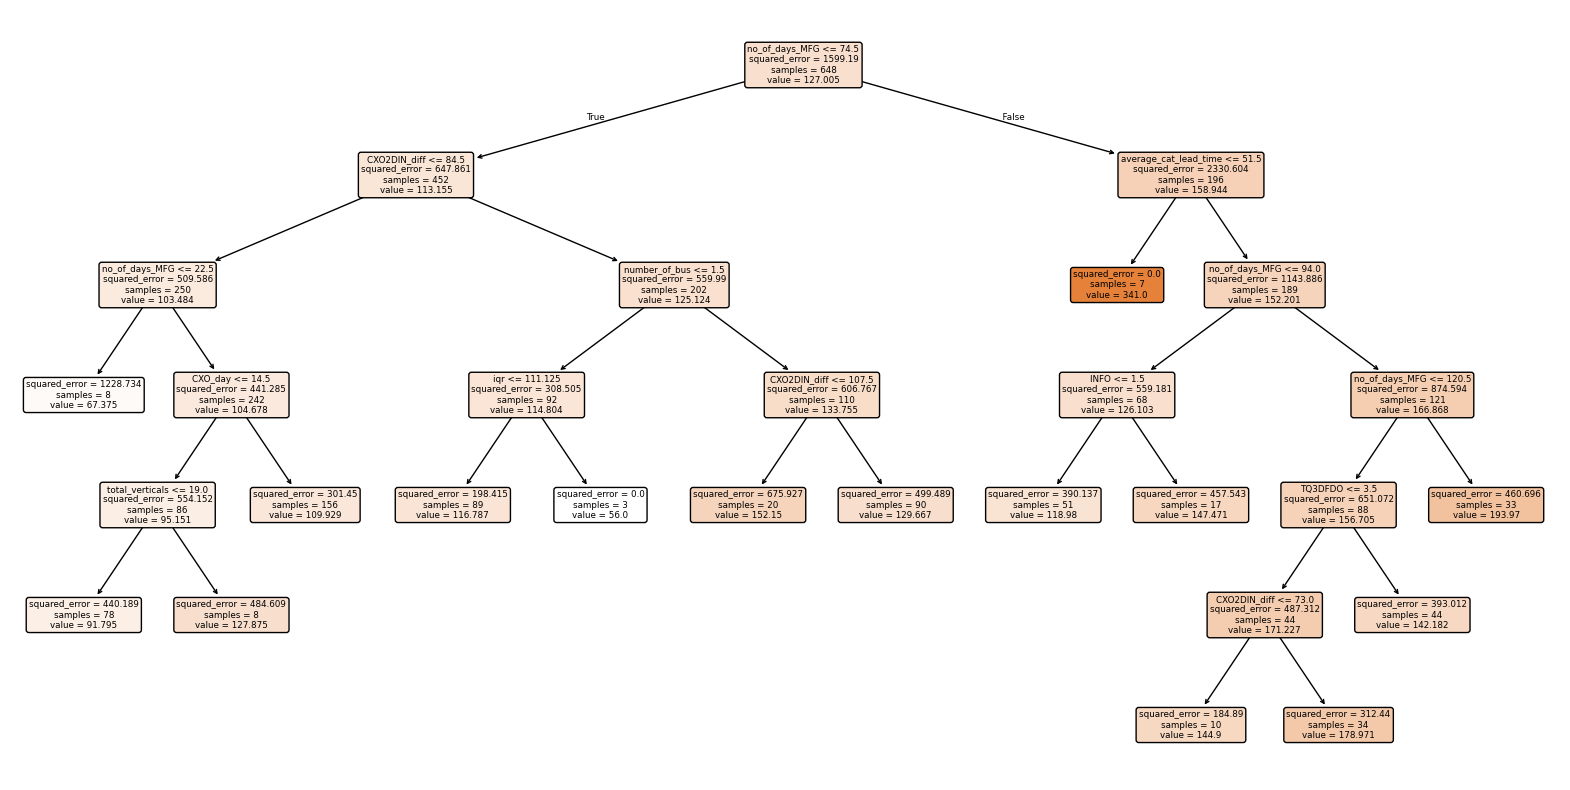

In [42]:
# @title Tree diagram with optimail decesion.



# Assuming 'optimal_dt_reg' is your trained decision tree model
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(optimal_dt_reg, feature_names=X.columns, filled=True, rounded=True, class_names=True)
plt.show()


-->Still attempting to find out the model with more accuracy

**Random Forests for Regression**

Random Forests are an ensemble learning method that combines multiple decision trees to make predictions. They are known for their robustness, accuracy, and ability to handle complex datasets.

In [43]:
# Implement RF model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [44]:
y_pred_rf=rf_regressor.predict(X_test)

In [45]:
r2_rf=r2_score(y_test,y_pred_rf)
print(f"Random forest R2 score:{r2_rf}")
mse_rf=mean_squared_error(y_test,y_pred_rf)
print(f"MSE for RF:{mse_rf}")

# Training accuracy
rf_y_pred_train = rf_regressor.predict(X_train)
train_accuracy_rf = r2_score(y_train, rf_y_pred_train)
print(f"Random Forest Train Accuracy : {train_accuracy_rf}")

# Test accuracy
test_accuracy_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")

Random forest R2 score:0.8213424065780465
MSE for RF:265.13828420432503
Random Forest Train Accuracy : 0.968996670713112
Random Forest Test Accuracy: 0.8213424065780465


In [46]:
# @title GridSearch CV on RF Regressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R-squared:", grid_search.best_score_)

best_rf_regressor = grid_search.best_estimator_

# Training accuracy
rf_grdcv_y_pred_train = best_rf_regressor.predict(X_train)
y_pred_rf_grdcv=best_rf_regressor.predict(X_test)
train_accuracy_rf_grdcv = r2_score(y_train, rf_grdcv_y_pred_train)
print(f"Random Forest GridSV Train Accuracy : {train_accuracy_rf_grdcv}")

# Test accuracy
test_accuracy_rf_grdcv = r2_score(y_test, y_pred_rf_grdcv)
print(f"Random Forest GridSV Test Accuracy: {test_accuracy_rf_grdcv}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}
Best R-squared: 0.7879718523130927
Random Forest GridSV Train Accuracy : 0.9703911487816773
Random Forest GridSV Test Accuracy: 0.8242420271712009


In [47]:
# @title Pruning alpha for RF regressor and calculate RF pruning test and train accuracy


# Define a range of ccp_alpha values to explore
ccp_alphas = np.linspace(0, 0.1, 10)  # Adjust the range as needed

# Train a random forest for each alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = RandomForestRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate each model on the training and test sets
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Find the best alpha value based on test scores
optimal_alpha = ccp_alphas[np.argmax(test_scores)]
print(f"Optimal Alpha for pruning: {optimal_alpha}")

# Train the final pruned model using the optimal alpha
optimal_rf_regressor = RandomForestRegressor(ccp_alpha=optimal_alpha)
optimal_rf_regressor.fit(X_train, y_train)

# Evaluate the pruned model
optimal_y_pred = optimal_rf_regressor.predict(X_test)
optimal_r2 = r2_score(y_test, optimal_y_pred)
print(f"Random Forest with optimal alpha R-squared: {optimal_r2}")

# Training accuracy for the optimal model
optimal_y_pred_train = optimal_rf_regressor.predict(X_train)
train_accuracy_optimal_rf = r2_score(y_train, optimal_y_pred_train)
print(f"Optimal Random Forest Train Accuracy: {train_accuracy_optimal_rf}")

# Test accuracy for the optimal model
test_accuracy_optimal_rf = r2_score(y_test, optimal_y_pred)
print(f"Optimal Random Forest Test Accuracy: {test_accuracy_optimal_rf}")

Optimal Alpha for pruning: 0.1
Random Forest with optimal alpha R-squared: 0.8327459366181231
Optimal Random Forest Train Accuracy: 0.9726386102844358
Optimal Random Forest Test Accuracy: 0.8327459366181231


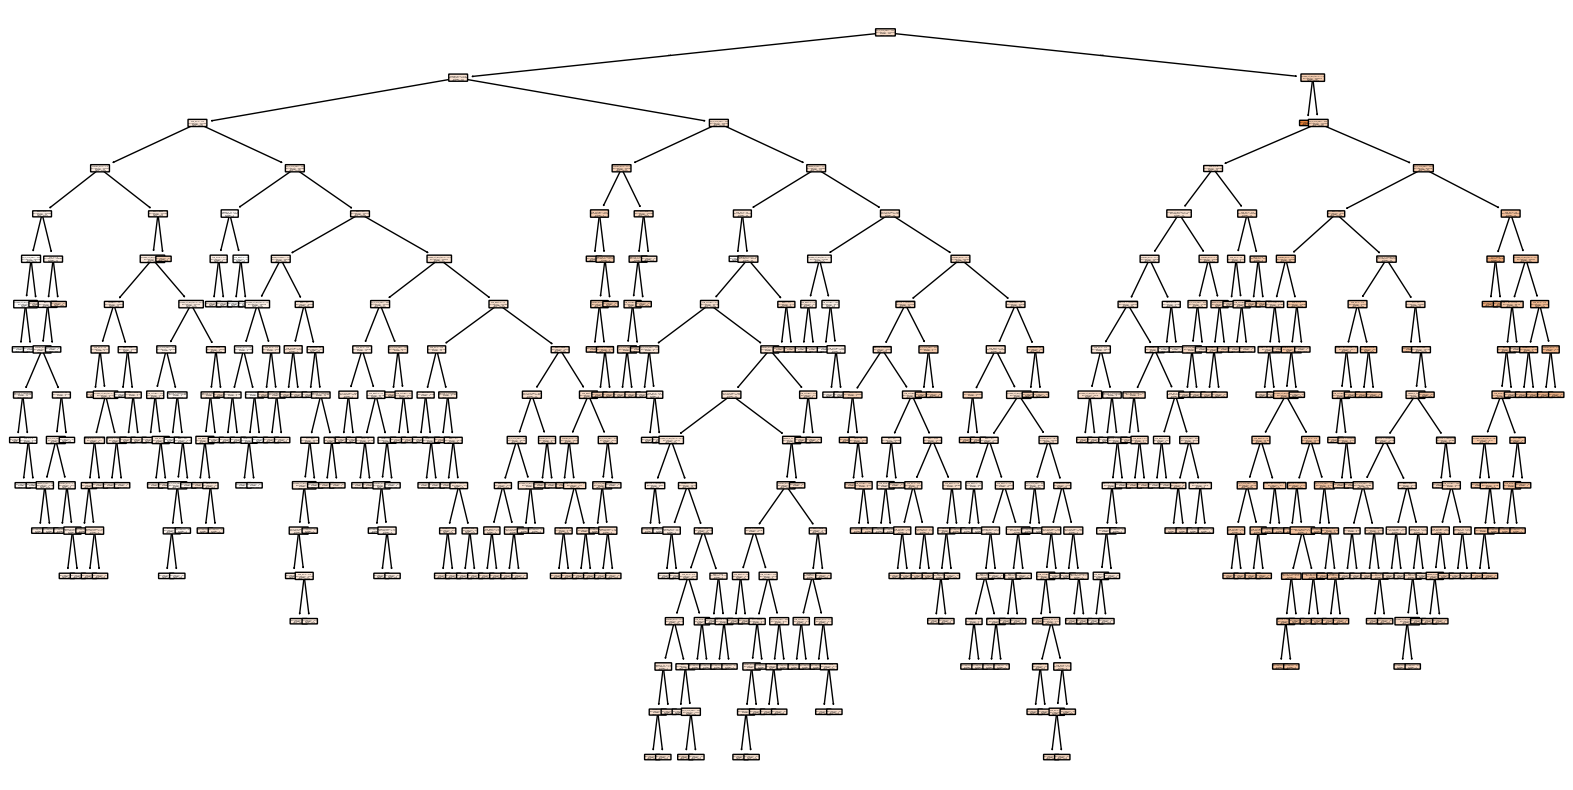

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
estimator = rf_regressor.estimators_[0]
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(estimator,
          feature_names=X.columns,  # Replace X with your feature data
          filled=True,
          rounded=True,
          class_names=True) # if it's a classification problem, provide class names
plt.show()

In [49]:
# @title Attempting with Support vector regression (SVR)

# create std scallar object
scallar=StandardScaler()

# fit the scalar for train and test
X_train_std=scallar.fit_transform(X_train)
X_test_std=scallar.transform(X_test)

#create SVR
svr_regressor=SVR(kernel='rbf')

#fit the model for SVR
svr_regressor.fit(X_train_std,y_train)

# prediction with SVR
y_pred_svr=svr_regressor.predict(X_test_std)

# evaluate the model
r2_svr=r2_score(y_test,y_pred_svr)
print(f"SVR R2 score:{r2_svr}")
mse_svr=mean_squared_error(y_test,y_pred_svr)
print(f"MSE for SVR:{mse_svr}")

# Training accuracy for SVR
svr_y_pred_train = svr_regressor.predict(X_train_std)
train_accuracy_svr = r2_score(y_train, svr_y_pred_train)
print(f"SVR Train Accuracy : {train_accuracy_svr}")

# Test accuracy for SVR (already calculated as r2_svr)
print(f"SVR Test Accuracy: {r2_svr}")


SVR R2 score:0.21092477804059506
MSE for SVR:1171.0336317155118
SVR Train Accuracy : 0.20589935781625246
SVR Test Accuracy: 0.21092477804059506


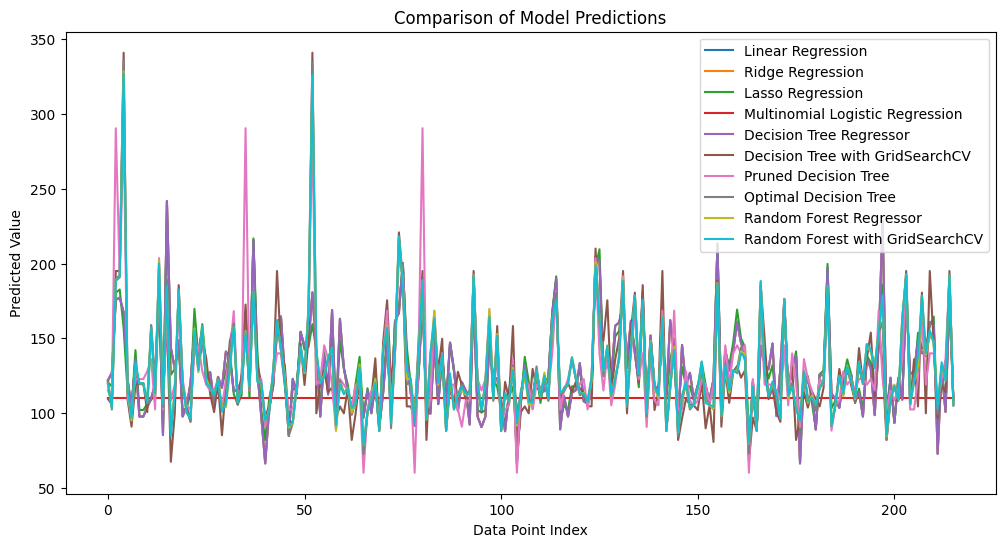

In [50]:
# @title Prediction trend among various models- visulization

import matplotlib.pyplot as plt


# Create a dictionary to store the model names and their predictions
models = {
    "Linear Regression": lr_y_pred,
    "Ridge Regression": ridge_y_pred,
    "Lasso Regression": lasso_y_pred,
    "Multinomial Logistic Regression": mlr_y_pred,
    "Decision Tree Regressor": dt_reg_y_pred,
    "Decision Tree with GridSearchCV": hyp_gscv_y_pred,
    "Pruned Decision Tree": pruned_y_pred,
    "Optimal Decision Tree": optimal_y_pred,
    "Random Forest Regressor": y_pred_rf,
    "Random Forest with GridSearchCV": y_pred_rf_grdcv,
    # Add more models here if needed
}

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the predictions for each model
for model_name, predictions in models.items():
    ax.plot(predictions, label=model_name)

# Customize the plot
ax.set_xlabel("Data Point Index")
ax.set_ylabel("Predicted Value")
ax.set_title("Comparison of Model Predictions")
ax.legend()

# Display the plot
plt.show()


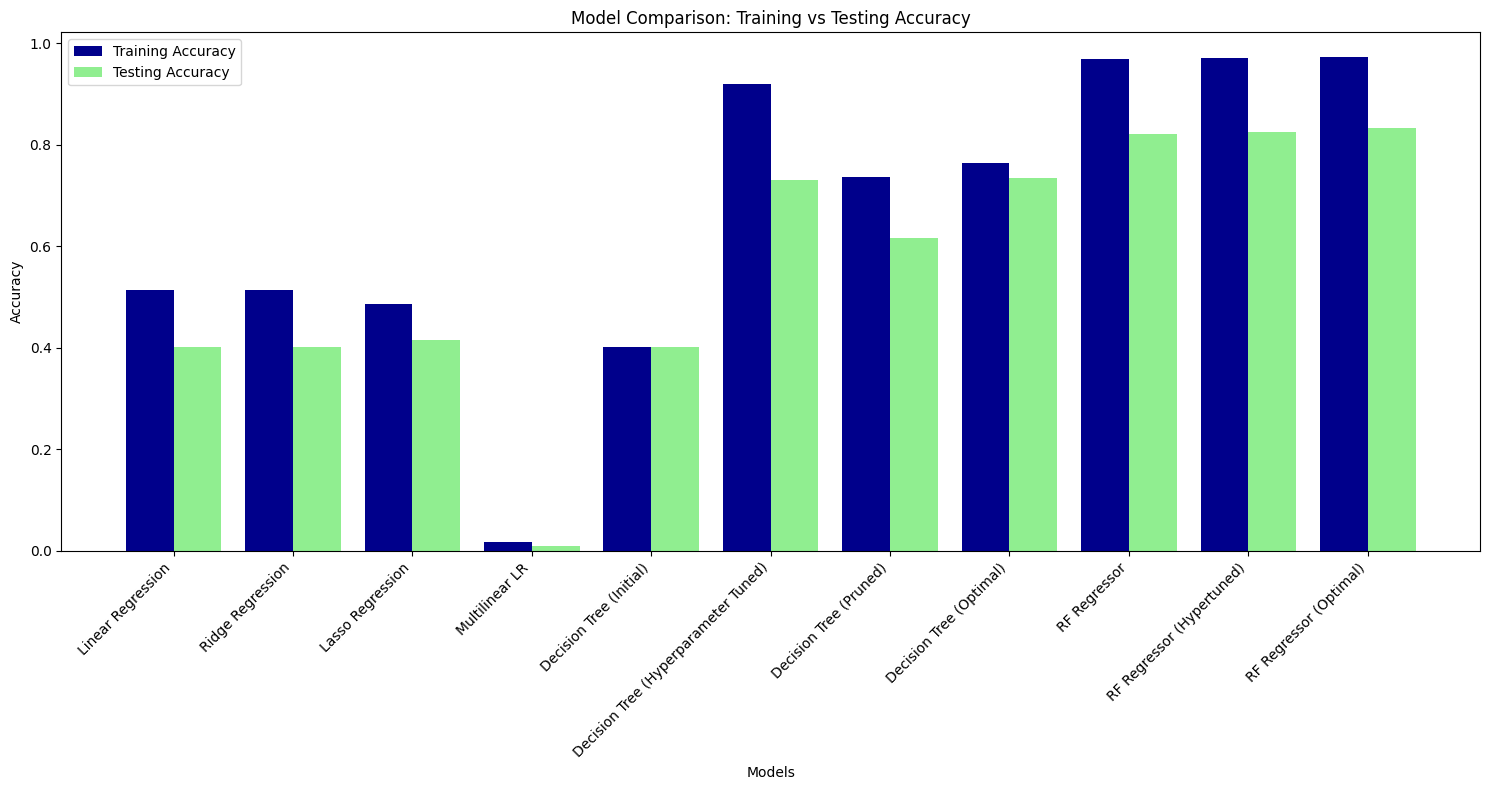

In [51]:
# @title Compare models- visulization

# collecting all model scores
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Multilinear LR', 'Decision Tree (Initial)', 'Decision Tree (Hyperparameter Tuned)', 'Decision Tree (Pruned)', 'Decision Tree (Optimal)','RF Regressor','RF Regressor (Hypertuned)','RF Regressor (Optimal)']
train_scores = [regressor.score(X_train, y_train), ridge_reg.score(X_train, y_train), lasso_reg.score(X_train, y_train), mlr_train_accuracy, r2_score(y_test, dt_reg_y_pred), train_accuracy_hyp_gscv, train_accuracy_pruned, train_accuracy_optimal_dt,train_accuracy_rf,train_accuracy_rf_grdcv,train_accuracy_optimal_rf]
test_scores = [regressor.score(X_test, y_test), ridge_reg.score(X_test, y_test), lasso_reg.score(X_test, y_test), mlr_test_accuracy, r2_score(y_test, dt_reg_y_pred), test_accuracy_hyp_gscv, test_accuracy_pruned, test_accuracy_optimal_dt,test_accuracy_rf,test_accuracy_rf_grdcv,test_accuracy_optimal_rf]

x_pos = np.arange(len(models))

plt.figure(figsize=(15, 8))
plt.bar(x_pos - 0.2, train_scores, width=0.4, label='Training Accuracy',color='darkblue')
plt.bar(x_pos + 0.2, test_scores, width=0.4, label='Testing Accuracy',color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.xticks(x_pos, models, rotation=45, ha="right")
plt.ylabel('Accuracy')
plt.title('Model Comparison: Training vs Testing Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [52]:
# @title MFG days from assembly shop calculation
#split and model for mfg days
# this model used to predict MFG days while feeding type of board
# to predict number of MFG days wrto type of the board
prd_mfgdays_dataset=prefinal_dataset[['TF3', 'TF900', 'RP', 'TQ3SFF', 'TQ3SFDO','TQ3DF Fxd', 'TQ3DFDO','total_verticals', 'INFO', 'type_board','FAULT LEVEL', 'BUSBAR LOCATION', 'FORM OF SEPARATION', 'FIXED/DRAWOUT','SYSTEM',
                                  'number_of_bus', 'number_2_tier','CXO2DIN_diff', 'EQP','no_of_days_MFG']]


X1=prd_mfgdays_dataset.iloc[:,:-1]
y1=prd_mfgdays_dataset.iloc[:,-1]
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.25,random_state=0)
# testing in LR
regressor1= LinearRegression()
regressor1.fit(X1_train,y1_train)
y1_pred=regressor1.predict(X1_test)
print("LR-Training set accuracy = " + str(regressor1.score(X1_train, y1_train)))
print("LR-Test set accuracy = " + str(regressor1.score(X1_test, y1_test)))
#testing wiht DT

dt_reg1 =  DecisionTreeRegressor(max_depth=5,min_samples_leaf=10) # depth 2 with leaf 2 only considered
dt_reg1.fit(X1_train, y1_train)
dt_reg_y1_pred = dt_reg1.predict(X1_test)
dt_reg_y1_train = dt_reg1.predict(X1_train)
print("Test R2 score DT for mfg days:"+ str( r2_score(y1_test, dt_reg_y1_pred)))
print("Train R2 score DT for mfg days:"+ str( r2_score(y1_train, dt_reg_y1_train)))

# testing with RF
rf_regressor1= RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor1.fit(X1_train,y1_train)
y1_pred_rf=rf_regressor1.predict(X1_test)
y1_train_rf=rf_regressor1.predict(X1_train)
print("RF-Training set accuracy = " + str(rf_regressor1.score(X1_train, y1_train)))
print("RF-Test set accuracy = " + str(rf_regressor1.score(X1_test, y1_test)))

# testing with prunig optimal for RF

# Define a range of ccp_alpha values to explore
ccp_alphas = np.linspace(0, 0.1, 10)  # Adjust the range as needed

# Train a random forest for each alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = RandomForestRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X1_train, y1_train)
    clfs.append(clf)

# Evaluate each model on the training and test sets
train_scores1 = [clf.score(X1_train, y1_train) for clf in clfs]
test_scores1 = [clf.score(X1_test, y1_test) for clf in clfs]

# Find the best alpha value based on test scores
optimal_alpha1 = ccp_alphas[np.argmax(test_scores1)]
print(f"Optimal Alpha1 for pruning: {optimal_alpha1}")

# Train the final pruned model using the optimal alpha
optimal_rf_regressor1 = RandomForestRegressor(ccp_alpha=optimal_alpha1)
optimal_rf_regressor1.fit(X1_train, y1_train)

# Evaluate the pruned model
optimal_y1_pred = optimal_rf_regressor1.predict(X1_test)
optimal1_r2 = r2_score(y1_test, optimal_y1_pred)
print(f"Random Forest with optimal alpha R-squared: {optimal1_r2}")

# Training accuracy for the optimal model
optimal_y1_pred_train = optimal_rf_regressor1.predict(X1_train)
train_accuracy_optimal_rf1 = r2_score(y1_train, optimal_y1_pred_train)
print(f"Optimal Random Forest Train Accuracy: {train_accuracy_optimal_rf1}")

# Test accuracy for the optimal model
test_accuracy_optimal_rf1 = r2_score(y1_test, optimal_y1_pred)
print(f"Optimal Random Forest Test Accuracy: {test_accuracy_optimal_rf1}")

# optimal_rf_regressor1 selected as better model to predict MFG days to provide input for final model calculation


LR-Training set accuracy = 0.16096349067165805
LR-Test set accuracy = 0.13277887551119982
Test R2 score DT for mfg days:0.2807396862894057
Train R2 score DT for mfg days:0.33569338255295644
RF-Training set accuracy = 0.8953001640253195
RF-Test set accuracy = 0.4969032145703731
Optimal Alpha1 for pruning: 0.0
Random Forest with optimal alpha R-squared: 0.49119408376168006
Optimal Random Forest Train Accuracy: 0.896740069753895
Optimal Random Forest Test Accuracy: 0.49119408376168006


In [53]:
# @title Analysing Importances of Feature for MFG days from assembly shop calculation
feature_importances1 = optimal_rf_regressor1.feature_importances_

feature_importance_df1 = pd.DataFrame({'Feature': X1.columns, 'Importance': feature_importances1})
feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)
feature_importance_df1


# Create the Altair chart
alt.Chart(feature_importance_df1).mark_bar().encode(
    x='Importance',
    y=alt.Y('Feature', sort='-x')
).properties(
    title='Feature Importance'
)

alt.Chart(...)

In [54]:
## Selecting details from CXO file


# load CXO file
#df_cxo_file_ois = pd.read_excel("/content/drive/MyDrive/Dissertation_dc04382/sypf648.xls",sheet_name='OIS')
df_cxo_file_ois = pd.read_excel("/content/drive/MyDrive/Dissertation_dc04382/Farakka.xls",sheet_name='OIS')
#df_cxo_file_ois = pd.read_excel("/content/drive/MyDrive/Dissertation_dc04382/CXO.xls",sheet_name='OIS')



# Selecting the details from CXO for SWBD

def cxo_details(df_cxo_file_ois,sw):
  #if isinstance(row['Unnamed: 1'], str) and value_to_find in row['Unnamed: 1']:# for more generic
  for index,row in df_cxo_file_ois.iterrows():
    if isinstance(row['Unnamed: 1'],str) and sw in row['Unnamed: 1']:
      i =index+1

  #i = sw # Start i at the correct initial row index # not required iff delete
  new_swbd_df = pd.DataFrame()
  for index, row in df_cxo_file_ois.loc[i:].iterrows():
      if pd.isna(row['Unnamed: 1']):#['Order Initiation Sheet\n(CXO Handover Document- LV)']): # Explicitly check for NaN in 'Column1'
          #print(f"NaN found in 'Order Initiation Sheet\n(CXO Handover Document- LV)' at index {index}")
          break  # Exit loop when encountering NaN in 'Column1'
      else:
          new_swbd_df = pd.concat([new_swbd_df, df_cxo_file_ois.loc[[index]]], ignore_index=True)

  else:  # This block executes if the loop completes without encountering a break
      print("No null values found in 'Unnamed: 1')'. The entire DataFrame has been processed.")
  return new_swbd_df


swbd_cxo= cxo_details(df_cxo_file_ois,'Switchboard Details')

set_columns=pd.DataFrame(columns = ['-','Switchboard Tag as per PO', 'Greenfield/ R&M','Separately Billable?', 'Billable Qty',
                                  'Equipment  Number','Panel or Item Qty', 'As booked Price in INR', 'As booked Cost in INR',
                                  'Margin - OT %', '% ESE Final GM','Upstream Margin in % of Sales Value', '% CCO GM', 'PCC Panel',
                                  'PCC Panel Qty', 'MCC Panel', 'MCC Panel Qty', '300/320mm pnl', 'EQPs'])


swbd_cxo.columns=set_columns.columns
swbd_cxo = swbd_cxo.fillna(0)
# Making default value
tf900=0
tq3dffxd=0
tq3dfdo=0
tq3sff=0
tq3sfdo=0

type_board=2
form_of_separation=1
busbar_location =1
number_of_bus=2
system=2
fault_level=2
number_2_tier=0
iqr=23
average_cat_lead_time=35
no_of_days_MFG=45
cxo2din_diff=120



for index, row in swbd_cxo.iterrows():
    if isinstance(row['MCC Panel'], str):
        if 'FX' in row['MCC Panel']:  # tera
            #swbd_cxo.loc[index, 'Fixed/Drawout'] = 2
            #tq3dffxd=swbd_cxo.loc[0,'MCC Panel Qty'] #TQ3DF Fxd
            fixed_drawout=2


        else:
            #swbd_cxo.loc[index, 'Fixed/Drawout'] = 1
            tq3dfdo=swbd_cxo.loc[0,'MCC Panel Qty'] # TQ3DFDO
            fixed_drawout=1


for index, row in swbd_cxo.iterrows():
    if isinstance(row['PCC Panel'], str):
        if 'TS' in row['PCC Panel'] or 'TX' in row['PCC Panel']:
          info=2

            #swbd_cxo.loc[index, 'INFO'] = 2
        elif 'CDO+' in row['PCC Panel']:
          info=3

            #swbd_cxo.loc[index, 'INFO'] = 3
        else:
          info=1
            #swbd_cxo.loc[index, 'INFO'] = 1

def find_row_with_value(df_cxo_file_ois, value_to_find):
    for index, row in df_cxo_file_ois.iterrows():
     #print(row['Unnamed: 1'])
      if isinstance(row['Unnamed: 1'], str) and value_to_find in row['Unnamed: 1']:# for more generic
      #if row['Unnamed: 1'] == value_to_find:
        return df_cxo_file_ois.loc[index,'Unnamed: 3']


cx_date = df_cxo_file_ois.loc[0, 'Date'] # CXO date data
tf3=swbd_cxo.loc[0,'PCC Panel Qty'] # TF3

rp=swbd_cxo.loc[0,'300/320mm pnl'] # RP


mccmod= tq3dffxd+tq3dfdo+tq3sff+tq3sfdo
pcctot=tf3 + tf900 +rp
total_verticals=mccmod+pcctot

if mccmod >0:
  if pcctot>0:
    type_board==3
  elif pcctot==0:
    type_board==1
else:
    type_board==2


eqp=swbd_cxo.loc[0,'EQPs']# EQP data


final_tp=swbd_cxo.loc[0,'As booked Cost in INR']

# Convert the date string to datetime object
cx_date = pd.to_datetime(cx_date)

# Convert to numeric
yr = cx_date.year  # Access the year
mn = cx_date.month # Access the month
dt = cx_date.day  # Access the day

new_sample_data=np.array([[yr,mn,dt,tf3,tf900,rp,tq3sff,tq3sfdo,tq3dffxd,tq3dfdo,
                           total_verticals,info,type_board,fault_level,busbar_location,form_of_separation,
                           fixed_drawout,system,number_of_bus,number_2_tier,eqp,final_tp,iqr,average_cat_lead_time,no_of_days_MFG,cxo2din_diff]])
new_sample_data

array([[2.02400000e+03, 1.20000000e+01, 3.10000000e+01, 6.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 7.00000000e+00, 1.00000000e+00,
        2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 2.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        1.83200000e+01, 4.98771829e+06, 2.30000000e+01, 3.50000000e+01,
        4.50000000e+01, 1.20000000e+02]])

In [55]:
#  @title Predict with RF regressor

#predicted delivery in date

# Feed CXO date

#cx_date= input("Enter the cxo date (YYYYMMDD): ")


# Convert the date string to datetime object
#cx_date = pd.to_datetime(cx_date)

# Convert to numeric
#yr = cx_date.year  # Access the year
#mn = cx_date.month # Access the month
#dt = cx_date.day  # Access the day

# create API to feed the sample data

#new_sample_data = np.array([[yr,mn,dt,14,0,2,0,0,0,0,16,1,2,2,1,4,1,2,2.00,11,40.1,10593000,10.5,53,57,1]])

#new_sample_data = np.array([[yr,mn,dt,14,0,2,0,0,0,0,16,1,2,2,1,4,1,2,2.00,11,40.1,10593000,10.5,mfg_prd_days,57,1]])
      # ['CXO_year', 'CXO_month', 'CXO_day', 'TF3', 'TF900', 'RP', 'TQ3SFF',
      #  'TQ3SFDO', 'TQ3DF Fxd', 'TQ3DFDO', 'total_verticals', 'INFO',
      # 'type_board', 'FAULT LEVEL', 'BUSBAR LOCATION', 'FORM OF SEPARATION',
      # 'FIXED/DRAWOUT', 'SYSTEM', 'number_of_bus', 'number_2_tier', 'EQP',
      # 'FINAL TP', 'iqr', 'average_cat_lead_time', 'no_of_days_MFG',
      # 'CXO2DIN_diff'

#mfg_prd_days  = optimal_rf_regressor1.predict(new_sample1_data)
#new_sample1_data = np.array([[14,0,2,0,0,0,0,16,1,2,2,1,4,1,2,2.00,11,40.1]])

# Need to select below index "18"  to calcluate no_of days MFG
      # Index(['TF3', 'TF900', 'RP', 'TQ3SFF', 'TQ3SFDO', 'TQ3DF Fxd', 'TQ3DFDO',
      # 'total_verticals', 'INFO', 'type_board', 'FAULT LEVEL',
      # 'BUSBAR LOCATION', 'FORM OF SEPARATION', 'FIXED/DRAWOUT', 'SYSTEM',
      # 'number_of_bus', 'number_2_tier', 'EQP' ],

# Predict the output for the new data
predicted_delivery = optimal_rf_regressor.predict(new_sample_data)

# Print the predictions
print(f"Tentative number of days required for manufacturing : {int(predicted_delivery[0])}")

# Expected readyness / delivery ivery date.

predicted_date = cx_date + datetime.timedelta(days=int(predicted_delivery[0])) # converting to days
loading_month = predicted_date.month
loading_month = calendar.month_name[loading_month]
print(f"Expected delivery date: {predicted_date}")
print(f"Required loading month: {loading_month}'{predicted_date.year}")



Tentative number of days required for manufacturing : 140
Expected delivery date: 2025-05-20 00:00:00
Required loading month: May'2025
